# Homework 3

In this assignment, I will be choosing four stock tickers and providing analysis on certain statsitics of theirs. I will use methods similar to what was taught in class, along with the statistical analysis for each ticker. I will first implement the basic summary functions.

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

Now that we have our statistical functions, we can make a parent function that will gather each of the statistics values for us.

In [2]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

The function above will gather all of our summary statistics for us. Now that we have these variables, we can import some financial data that we can analyze. I will be importing the data from four different stocks, and using visualizations in order to make sense of their behavior (I know I said that I was going to use SPAQ, but it made all of the visualizations hard to understand). I will be analyzing NAK (mining company), IBIO (biotech company), VSLR (residential solar), and TNXP (pharma company).

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["NAK", "VSLR", "IBIO", "TNXP"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

Below will be a dataframe containing each stocks closing values dating back to 1/1/2012.

In [4]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,NAK,VSLR,IBIO,TNXP
Date,,,,
2012-01-03,6.40,NaN,9.0000,NaN
2012-01-04,6.45,NaN,9.0000,NaN
2012-01-05,6.47,NaN,9.0000,NaN
2012-01-06,6.37,NaN,8.9000,NaN
2012-01-09,6.31,NaN,8.8000,NaN
...,...,...,...,...
2020-09-18,1.11,33.240002,2.4600,0.9200
2020-09-21,1.11,33.090000,2.4300,0.9300
2020-09-22,1.11,34.529999,2.2700,0.9300


Next, I will plot each stocks daily closing price since the aforementioned date in one visualization.

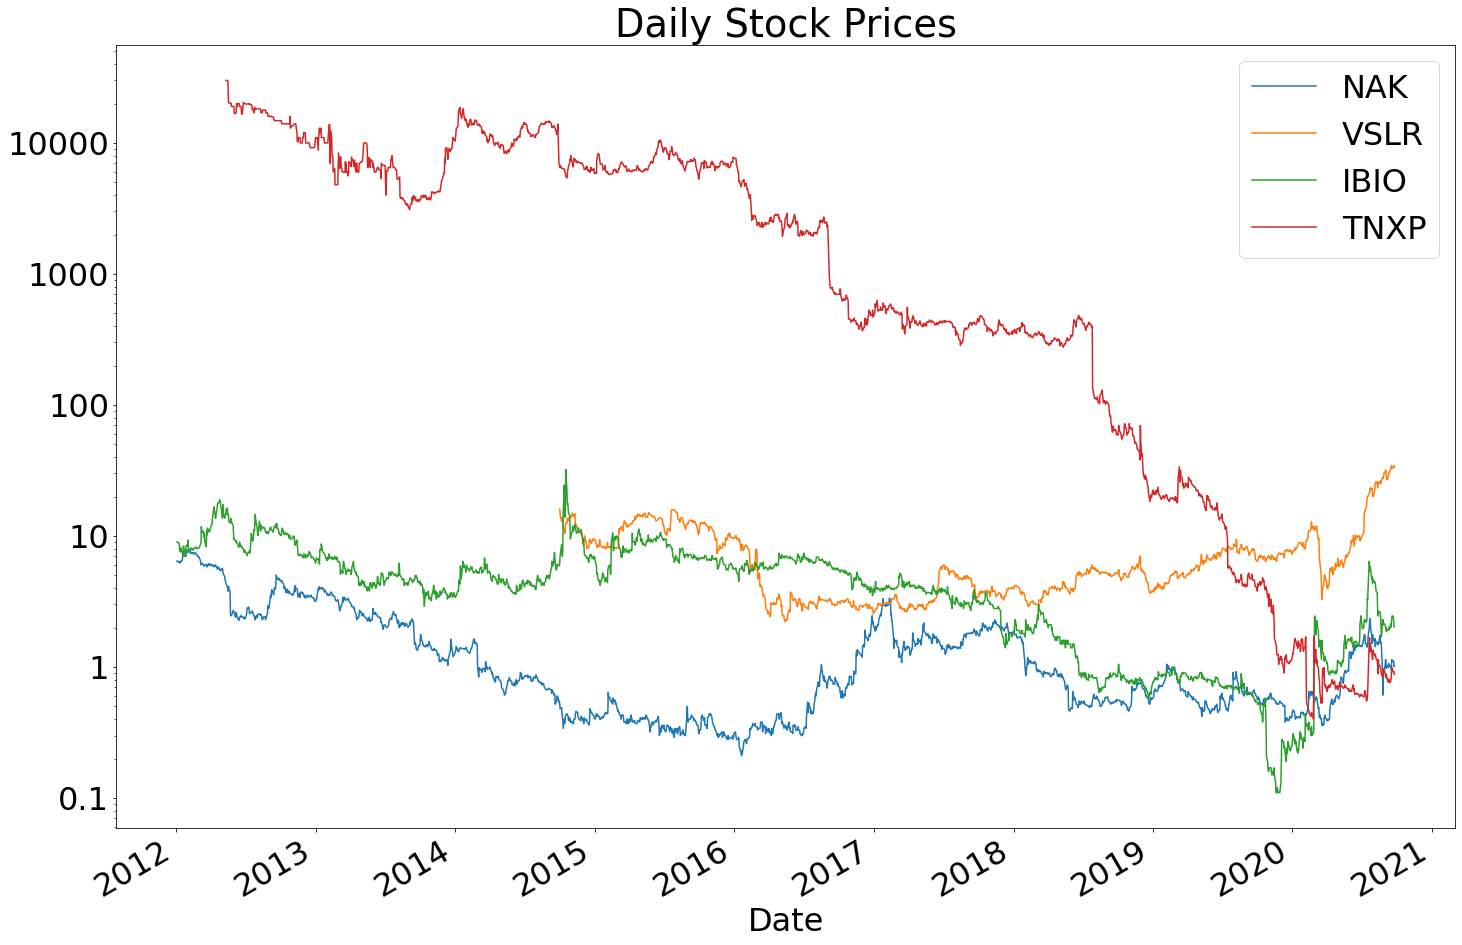

In [29]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals]) 

plt.title("Daily Stock Prices")
plt.show()
plt.close()

There are a few things that we can touch on after seeing this:
* TNXP investors in the early 2010s are probably still having nightmares about this stocks plummet.

* VSLR was not listed until ~2015. Knowing their background, this makes sense. With renewable energy source needs becoming more apparent, their recent uptick is warranted. 

* NAK has been trying to return to its former self, but it has struggled. Even though they were just granted access to the Alaska's Pebble mine project, which has billions of dollars worth of natural resources, after their environmental awareness documents got passed. I was very high on this stock about 2-3 weeks before the news, ended up buying a 2.50 call, and was let down in humiliating fashion.

* IBIO has seen a recent resurgence, after the big pharma surge regarding everyone racing to find new developments of COVID-19. If I had more pharma companies, it is likely that a very similar trend would be seen accross the field.

We've seen the closing prices in one graph now, but this data won't be too heplful for what we'd like to do with these stocks. We can instead, translate these numbers to a percent daily change value, where we can see how the stocks have moved day-by-day. These numbers will be easier to interpret when we run our functions with them. Their values will be more impactful than the daily closing values.

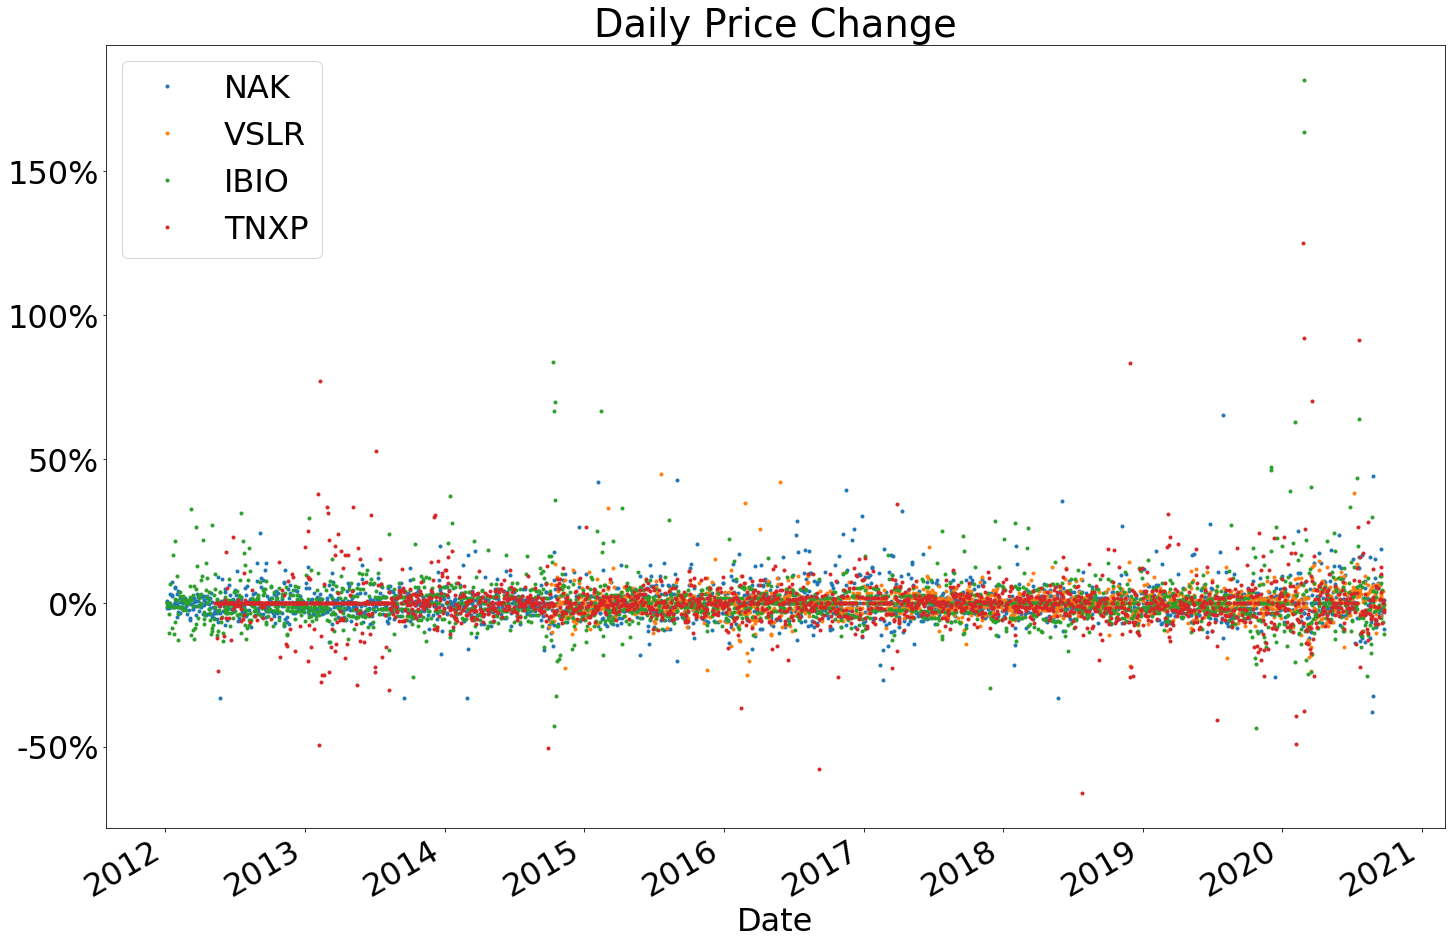

In [15]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals]) 


plt.show()
plt.close()

As can be seen above, these numbers will be much easier to visually and analytically admire. This chart allows us to see a breakdown of each stocks volatility, although it isn't exactly 'easy' to determine the values with our eyes. There are extreme points of change for every stock.

Now, we are going to call our parent function from before, to put the summary statistics of each stock (daily percent change).

In [7]:
stats_df = gather_statistics(price_change_data)
stats_df

,NAK,VSLR,IBIO,TNXP
mean,0.098,0.165,0.268,-0.148
median,0.000,0.000,0.000,0.000
variance,37.430,23.673,86.316,73.005
S.D.,6.118,4.866,9.291,8.544
skewness,0.000,-0.000,-0.000,-0.004
kurtosis,17.733,19.084,121.699,52.612


Pandas also allows us to make histograms. For example, I will construct one using NAK's price change data. This is very simple, but it is a good tool to know about.

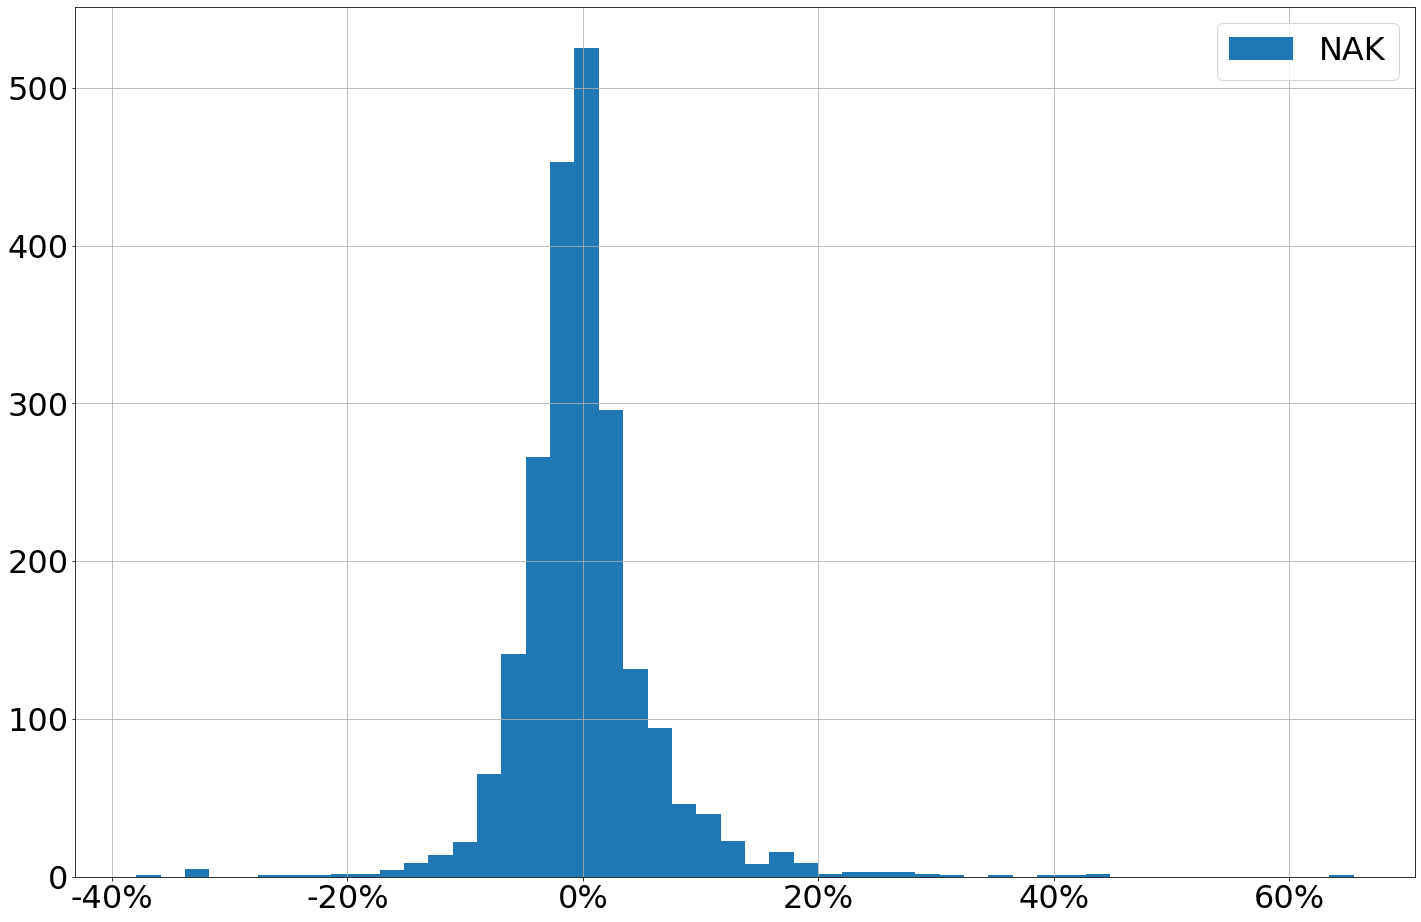

In [8]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NAK"].hist(bins = 50, label = "NAK")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

That looks nice, right? But, we can make it better. Currently, the y-axis is displaying the number of bins for each percent value. We can change this to percentages by adding 'density = true' to the following statement from the above code: price_change_data["NAK"].hist(bins = 50, label = "NAK"). See the new output:

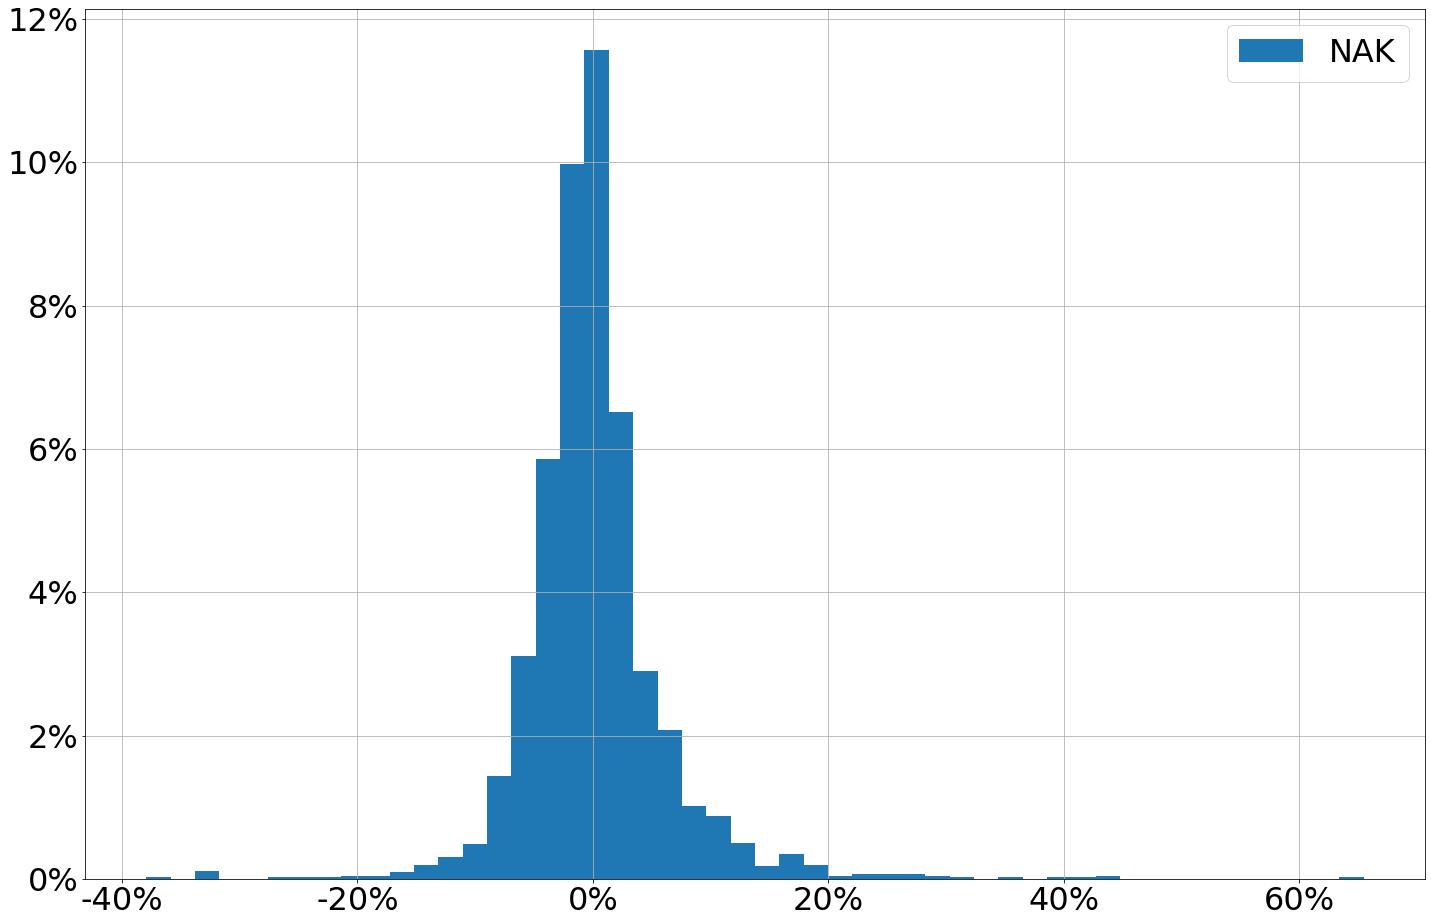

In [9]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NAK"].hist(bins = 50, label = "NAK", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

This is more useful for us. But, it would be even nicer if we could view all four stocks next to each other so we can analyze any similarities or differences between them. As seen in the code below, we can set the graph layout into quadrants so that we can see them all in one place, with the same layouts as the graph above this had.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92b1cd99d0>,
      dtype=object)

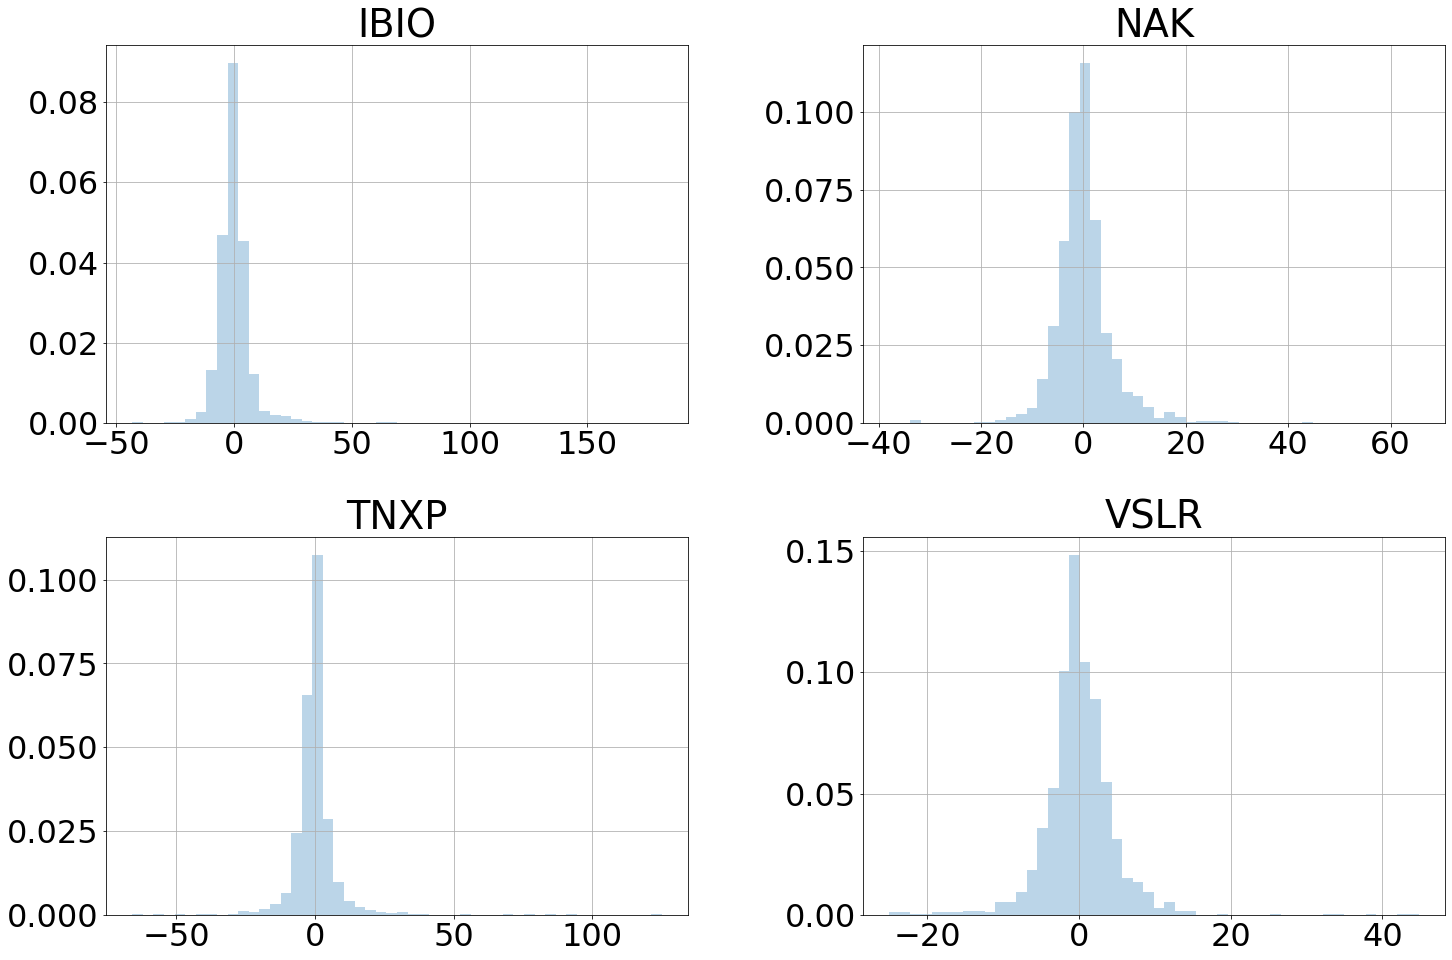

In [31]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

This is a much better way to visualize each stocks daily percent change. Next, we can add our descriptive statistics into each quadrant as well. This just gives us more information about each stock, all in one place. It adds extra later of understanding when looking at the graphs.

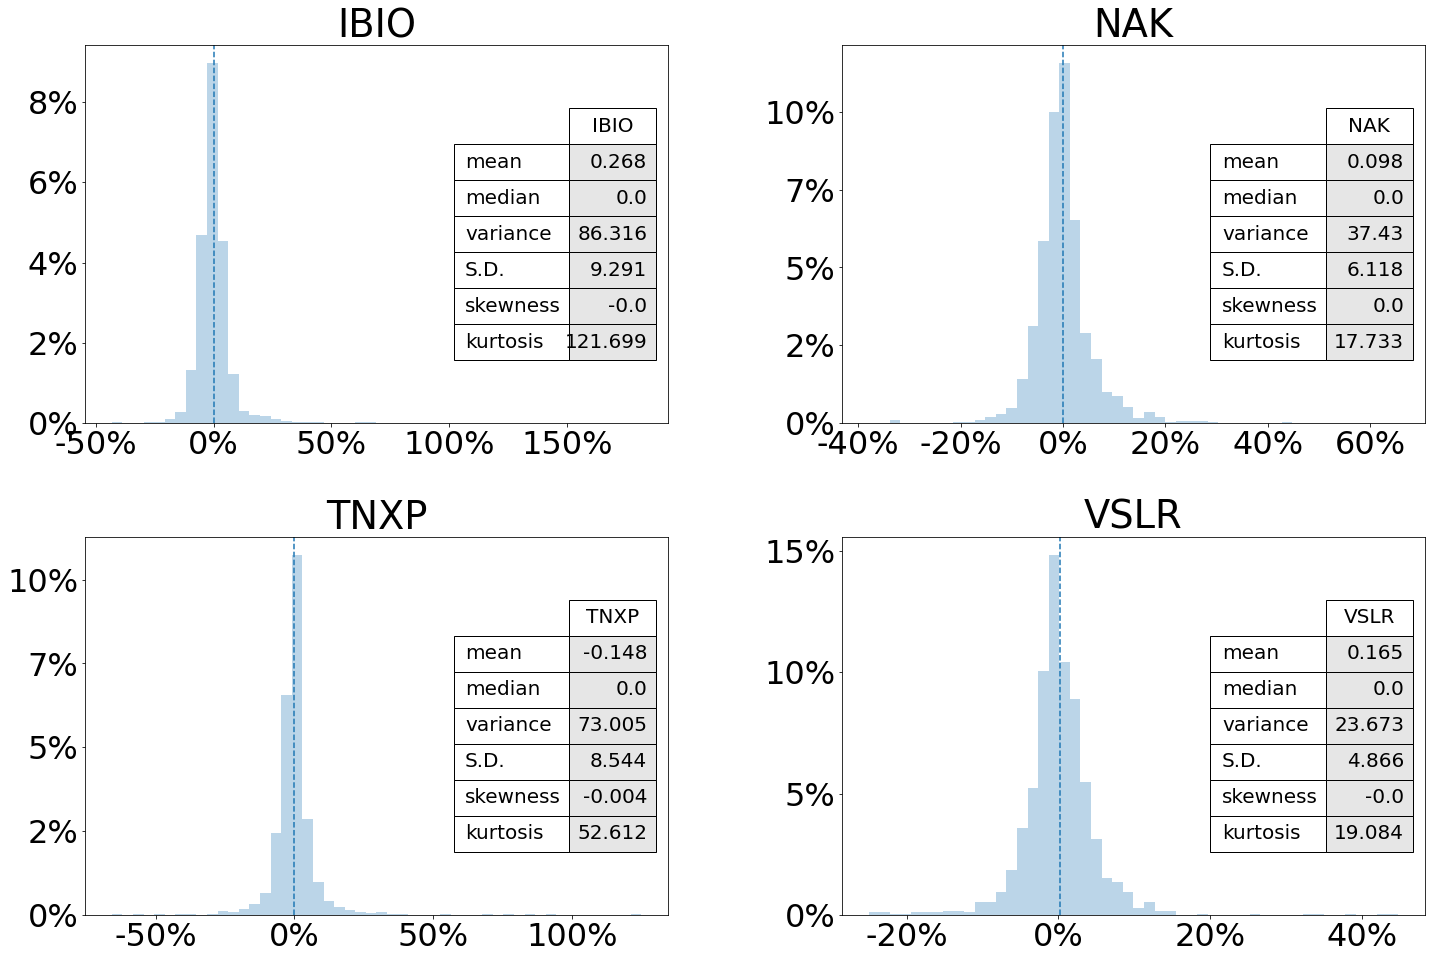

In [11]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   
plt.show()

Looking at the statistics for each stock, we see that IBIO's kurtosis value blows all others out of the water, while also having the largest mean change. On the other hand, we can see TNXP's mean, which relates to the steady decline TNXP has taken since 2012. Since IBIO has the largest mean and SD, we can conclude that it also has the highest kurtosis and variance. Likewise, we can see that since NAK has the lowest (absolute value) mean, their values will be the lowest respectively. 

Another useful thing we can do is plot all of the stocks' histograms on top of each other, like so:

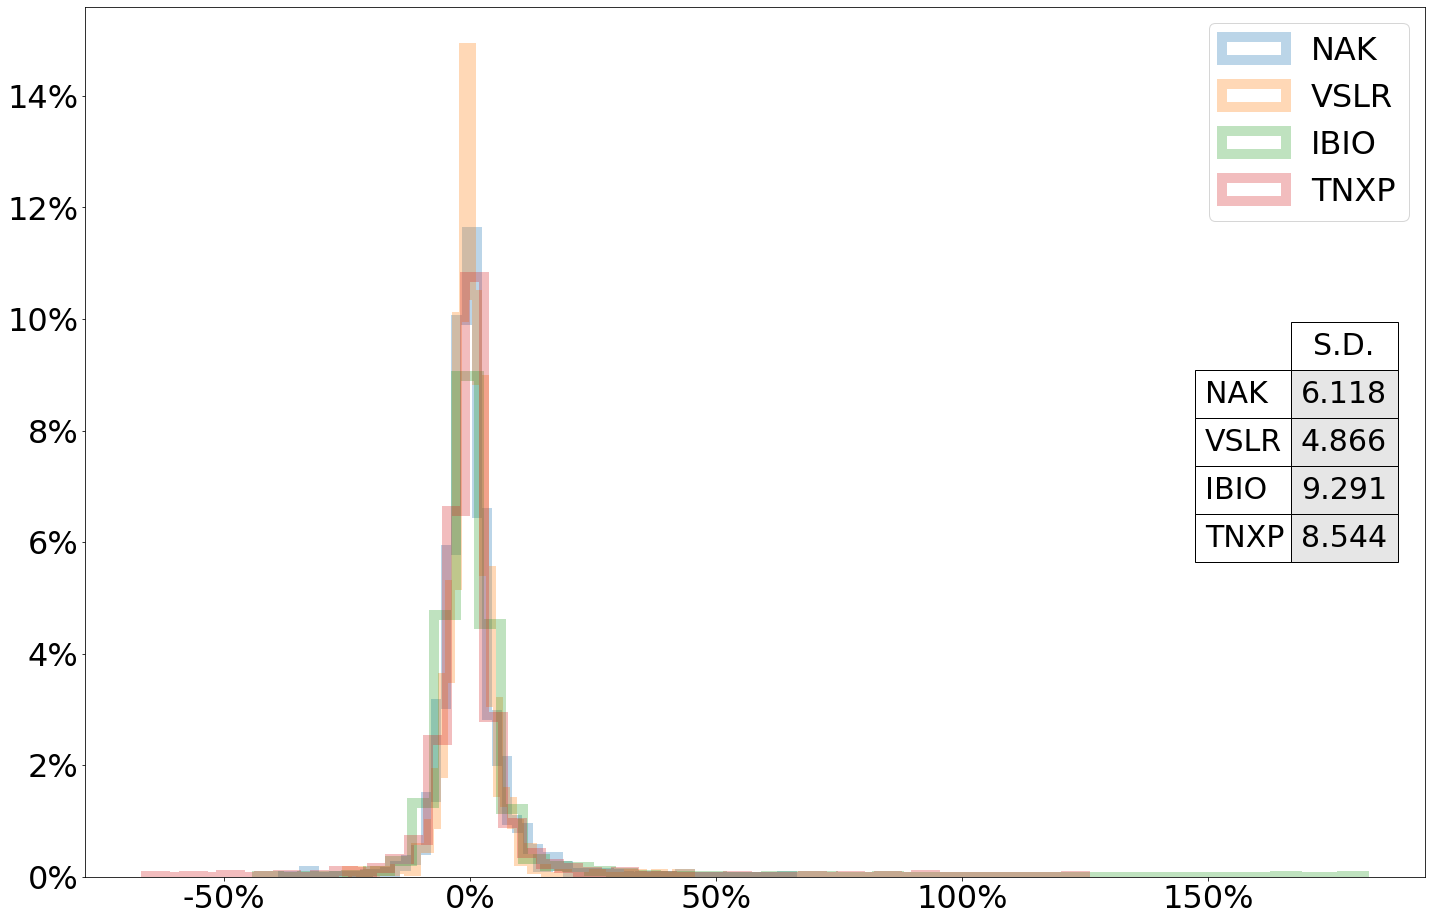

In [12]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

We can also do this, but with the histograms opaque instead.

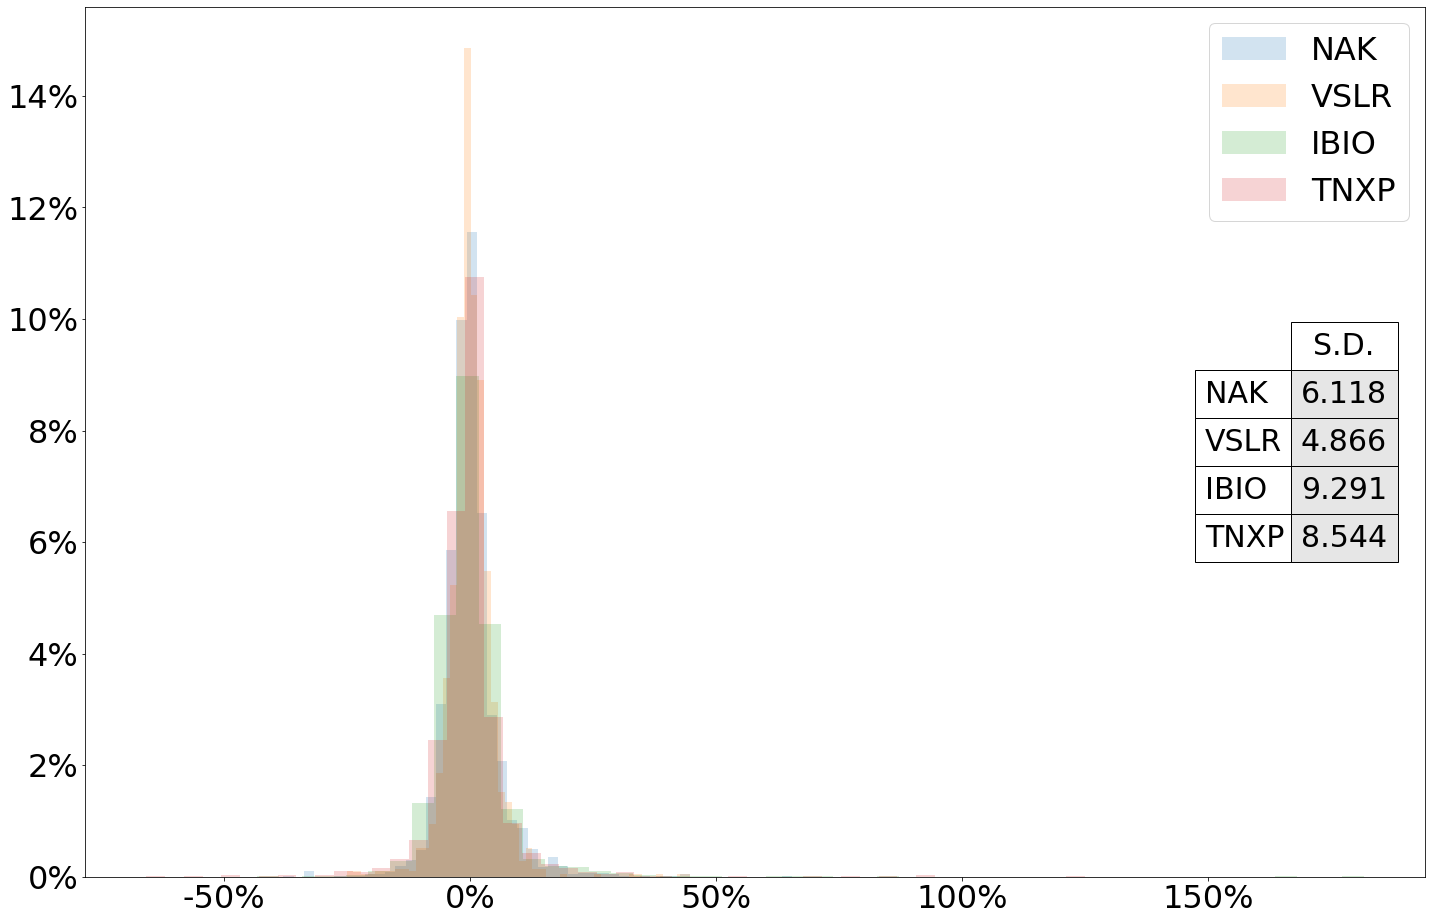

In [13]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats = table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

After analyzing the stacked histograms, we can see that the volatility of stocks (from least to most) goes as follows: VSLR, NAK, TNXP, IBIO. This means that VSLR is the stock (out of these four) that has the most drastic changes the most often. Most of these companies are well-established (with the exception of VSLR), so it makes sense that there is less volatility than that of up-and-coming companies that involve high-risk investments.

All in all, during this chapter, I learned how to design useful functions, visualize them, and understand what their visualizations/statistics represent. 